# Data Exploration

In [1]:
import os
from pathlib import Path

path = Path('data')
os.listdir(path)

['test.csv',
 'biomassters_download_instructions.md',
 'train.csv',
 'train_agbm_metadata.csv',
 'train_agbm',
 'test_features',
 'train_features',
 'features_metadata.csv']

In [2]:
import pandas as pd

features_metadata  = pd.read_csv(path / 'features_metadata.csv')
features_metadata

,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,train,September,1049524,3953454613,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,train,October,1049524,3531005382,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,train,November,1049524,1401197002,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,train,December,1049524,3253084255,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,train,January,1049524,2467836265,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
...,...,...,...,...,...,...,...,...,...,...,...
252421,fff812c0_S2_07.tif,fff812c0,S2,test,April,1443550,2918693602,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,fff812c0_agbm.tif
252422,fff812c0_S2_08.tif,fff812c0,S2,test,May,1443550,2058531511,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,fff812c0_agbm.tif
252423,fff812c0_S2_09.tif,fff812c0,S2,test,June,1443550,3628104827,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,fff812c0_agbm.tif
252424,fff812c0_S2_10.tif,fff812c0,S2,test,July,1443550,4220479807,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,fff812c0_agbm.tif


In [3]:
chips = features_metadata.chip_id.unique()
len(chips)

11462

In [4]:
import numpy as np

# 17, 18, 21, 22, 23, 24
# np.unique([len(features_metadata[features_metadata.chip_id == chip]) for chip in chips])

In [5]:
train = features_metadata[features_metadata.split == 'train'][["filename", "chip_id", "satellite", "month", "corresponding_agbm"]]
train.to_csv(path / 'train.csv')
train

,filename,chip_id,satellite,month,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,September,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,October,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,November,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,December,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,January,0003d2eb_agbm.tif
...,...,...,...,...,...
252398,fff05995_S2_07.tif,fff05995,S2,April,fff05995_agbm.tif
252399,fff05995_S2_08.tif,fff05995,S2,May,fff05995_agbm.tif
252400,fff05995_S2_09.tif,fff05995,S2,June,fff05995_agbm.tif
252401,fff05995_S2_10.tif,fff05995,S2,July,fff05995_agbm.tif


In [6]:
len(train.chip_id.unique())

8689

In [7]:
test = features_metadata[features_metadata.split == 'test'][["filename", "chip_id", "satellite", "month", "corresponding_agbm"]]
test.to_csv(path / 'test.csv')
test

,filename,chip_id,satellite,month,corresponding_agbm
522,00a28320_S1_00.tif,00a28320,S1,September,00a28320_agbm.tif
523,00a28320_S1_01.tif,00a28320,S1,October,00a28320_agbm.tif
524,00a28320_S1_02.tif,00a28320,S1,November,00a28320_agbm.tif
525,00a28320_S1_03.tif,00a28320,S1,December,00a28320_agbm.tif
526,00a28320_S1_04.tif,00a28320,S1,January,00a28320_agbm.tif
...,...,...,...,...,...
252421,fff812c0_S2_07.tif,fff812c0,S2,April,fff812c0_agbm.tif
252422,fff812c0_S2_08.tif,fff812c0,S2,May,fff812c0_agbm.tif
252423,fff812c0_S2_09.tif,fff812c0,S2,June,fff812c0_agbm.tif
252424,fff812c0_S2_10.tif,fff812c0,S2,July,fff812c0_agbm.tif


In [8]:
len(test.chip_id.unique())

2773

In [9]:
data = train[train.chip_id == train.chip_id.unique()[0]]
data

,filename,chip_id,satellite,month,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,September,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,October,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,November,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,December,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,January,0003d2eb_agbm.tif
5,0003d2eb_S1_05.tif,0003d2eb,S1,February,0003d2eb_agbm.tif
6,0003d2eb_S1_06.tif,0003d2eb,S1,March,0003d2eb_agbm.tif
7,0003d2eb_S1_07.tif,0003d2eb,S1,April,0003d2eb_agbm.tif
8,0003d2eb_S1_08.tif,0003d2eb,S1,May,0003d2eb_agbm.tif
9,0003d2eb_S1_09.tif,0003d2eb,S1,June,0003d2eb_agbm.tif


In [10]:
s1 = data[data.satellite == 'S1']
s1

,filename,chip_id,satellite,month,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,September,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,October,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,November,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,December,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,January,0003d2eb_agbm.tif
5,0003d2eb_S1_05.tif,0003d2eb,S1,February,0003d2eb_agbm.tif
6,0003d2eb_S1_06.tif,0003d2eb,S1,March,0003d2eb_agbm.tif
7,0003d2eb_S1_07.tif,0003d2eb,S1,April,0003d2eb_agbm.tif
8,0003d2eb_S1_08.tif,0003d2eb,S1,May,0003d2eb_agbm.tif
9,0003d2eb_S1_09.tif,0003d2eb,S1,June,0003d2eb_agbm.tif


In [11]:
import rasterio as rio 

image = s1.filename.iloc[0]
ds = rio.open(path / 'train_features' / image)

ds.shape, ds.indexes

/home/juan/miniconda3/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


((256, 256), (1, 2, 3, 4))

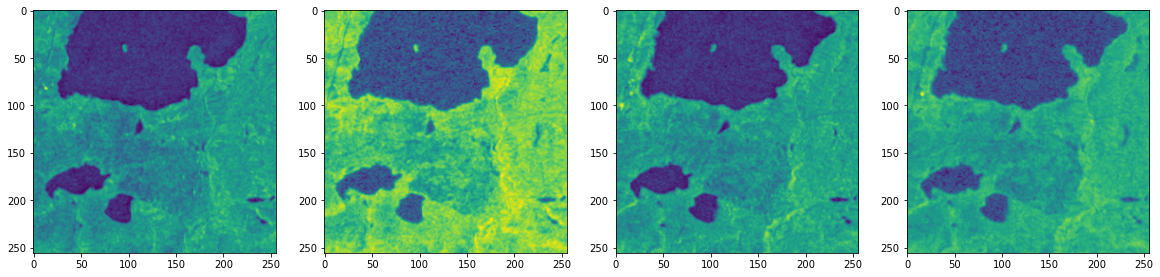

In [12]:
from rasterio.plot import show 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(141)
show(ds.read(1), ax=ax)
ax = plt.subplot(142)
show(ds.read(2), ax=ax)
ax = plt.subplot(143)
show(ds.read(3), ax=ax)
ax = plt.subplot(144)
show(ds.read(4), ax=ax)
plt.show()

In [13]:
x = ds.read()
x.shape, x.dtype, x.max(), x.min()

((4, 256, 256), dtype('float32'), -3.264444, -34.88572)

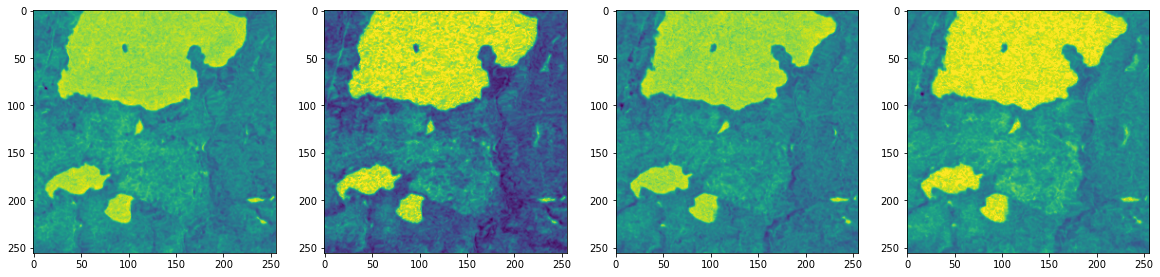

In [14]:
y = np.clip(x, -30, 0)*(-8.4) / 255.

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(141)
show(y[0], ax=ax)
ax = plt.subplot(142)
show(y[1], ax=ax)
ax = plt.subplot(143)
show(y[2], ax=ax)
ax = plt.subplot(144)
show(y[3], ax=ax)
plt.show()

In [15]:
y.min(), y.max()

(0.107534625, 0.98823524)

In [31]:
s2 = data[data.satellite == 'S2']
s2

,filename,chip_id,satellite,month,corresponding_agbm
12,0003d2eb_S2_00.tif,0003d2eb,S2,September,0003d2eb_agbm.tif
13,0003d2eb_S2_01.tif,0003d2eb,S2,October,0003d2eb_agbm.tif
14,0003d2eb_S2_05.tif,0003d2eb,S2,February,0003d2eb_agbm.tif
15,0003d2eb_S2_06.tif,0003d2eb,S2,March,0003d2eb_agbm.tif
16,0003d2eb_S2_07.tif,0003d2eb,S2,April,0003d2eb_agbm.tif
17,0003d2eb_S2_08.tif,0003d2eb,S2,May,0003d2eb_agbm.tif
18,0003d2eb_S2_09.tif,0003d2eb,S2,June,0003d2eb_agbm.tif
19,0003d2eb_S2_10.tif,0003d2eb,S2,July,0003d2eb_agbm.tif
20,0003d2eb_S2_11.tif,0003d2eb,S2,August,0003d2eb_agbm.tif


In [32]:
image = s2.filename.iloc[0]
ds = rio.open(path / 'train_features' / image)

ds.shape, ds.indexes

/home/juan/miniconda3/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


((256, 256), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


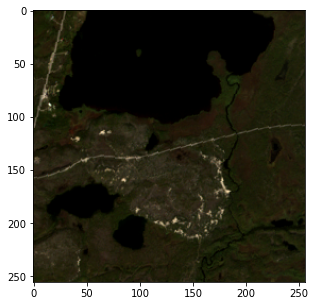

In [33]:
fig = plt.figure(figsize=(20,5))
ax = plt.subplot(111)
show(ds.read((3,2,1)) / 3000, ax=ax)
plt.show()

In [34]:
x = ds.read()
x.shape, x.dtype, x.max(), x.min()

((11, 256, 256), dtype('uint16'), 5244, 0)

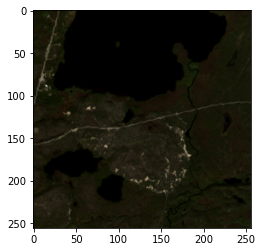

In [35]:
y = np.clip(ds.read((3,2,1)) / 4000, 0., 1.)

plt.imshow(y.transpose(1,2,0))
plt.show()

In [36]:
y.min(), y.max()

(0.00025, 0.86925)

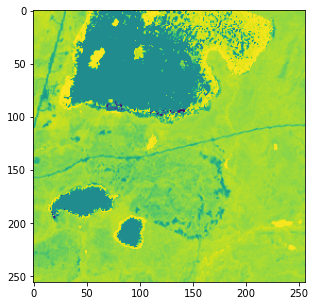

In [45]:
red = ds.read(3).astype(np.float32)
nir = ds.read(7).astype(np.float32)

ndvi = (nir - red) / (nir + red)

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(111)
show(ndvi, ax=ax, cmap='viridis')
plt.show()

In [46]:
ndvi.min(), ndvi.max()

(-0.95, 0.99642855)

In [22]:
label = s2.corresponding_agbm.iloc[0]
ds = rio.open(path / 'train_agbm' / label)

ds.shape, ds.indexes

((256, 256), (1,))

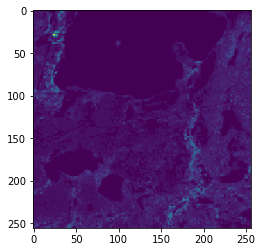

In [23]:
x = ds.read(1)

plt.imshow(x)
plt.show()

In [24]:
x.dtype, x.max(), x.min()

(dtype('float32'), 130.34, 0.0)

Tenemos que hacer regresión a estos valores.

In [25]:
from glob import glob 

train_agbm = glob(str(path / 'train_agbm' / '*.tif'))
len(train_agbm)

8689

In [26]:
from tqdm import tqdm 

# compute statistics for normalization

maxs, mins = [], []
means, stds = [], []
for image in tqdm(train_agbm):
	_x = rio.open(image).read(1)
	maxs.append(_x.max())
	mins.append(_x.min())
	means.append(_x.mean())
	stds.append(_x.std())

np.max(maxs), np.min(mins), np.mean(means), np.mean(stds)

100%|██████████| 8689/8689 [00:17<00:00, 483.75it/s]


(12905.3, 0.0, 63.32611, 63.456604)

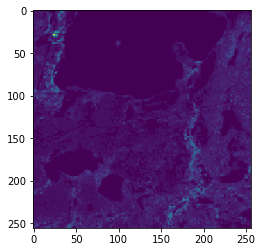

In [27]:
y = (x - 63.32611) / 63.456604

plt.imshow(y)
plt.show()

In [28]:
y.dtype, y.max(), y.min()

(dtype('float32'), 1.0560585, -0.9979436)

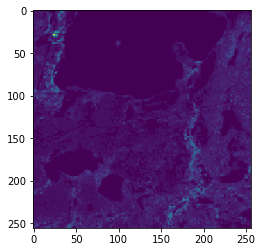

In [29]:
y = x / 12905.3

plt.imshow(y)
plt.show()

In [30]:
y.dtype, y.max(), y.min()

(dtype('float32'), 0.010099727, 0.0)